In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
from google.colab import files
import io

In [2]:
uploaded = files.upload()

Saving mushrooms.csv to mushrooms.csv


In [3]:
data = pd.read_csv("mushrooms.csv")
data.info()

print("Võ Thành Hoàng Phúc - 6351071056")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

# Câu 4

In [4]:
# Tách cột quyết định (Income) ra biến labels
labels = data['class']

# Tách phần còn lại làm features
features = data.drop(columns=['class'])

# Kiểm tra kết quả
print("Features shape:", features.shape)
print("Labels shape:", labels.shape)

print("\nFeatures columns:")
print(features.columns)

print("\nLabel samples:")
print(labels.head())

print("Võ Thành Hoàng Phúc - 6351071056")

Features shape: (8124, 22)
Labels shape: (8124,)

Features columns:
Index(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

Label samples:
0    p
1    e
2    e
3    p
4    e
Name: class, dtype: object
Võ Thành Hoàng Phúc - 6351071056


# Câu 5

In [5]:
features.select_dtypes(exclude=['int64']).columns
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [6]:
# Chuyển các cột dạng object sang one-hot vector
features_onehot = pd.get_dummies(features, columns=features.select_dtypes(exclude=['int64']).columns)
print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [7]:
features_onehot

,cap-shape_b,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_f,cap-surface_g,cap-surface_s,cap-surface_y,...,population_s,population_v,population_y,habitat_d,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,False,False,False,False,False,True,False,False,True,False,...,True,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
2,True,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,True,False,False,False,True,...,True,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,True,False,False,True,False,...,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,False,False,False,True,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8120,False,False,False,False,False,True,False,False,True,False,...,False,True,False,False,False,True,False,False,False,False
8121,False,False,True,False,False,False,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
8122,False,False,False,True,False,False,False,False,False,True,...,False,True,False,False,False,True,False,False,False,False


# Câu 6

In [8]:
X_train, X_test, y_train, y_test = train_test_split(features_onehot, labels, test_size=0.3, random_state=42)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


# Câu 7

In [9]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [10]:
#Predict the response for test dataset
tree_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
tree_score = metrics.accuracy_score(y_test, tree_pred)
print("Accuracy:", tree_score)
print("Report:", metrics.classification_report(y_test, tree_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


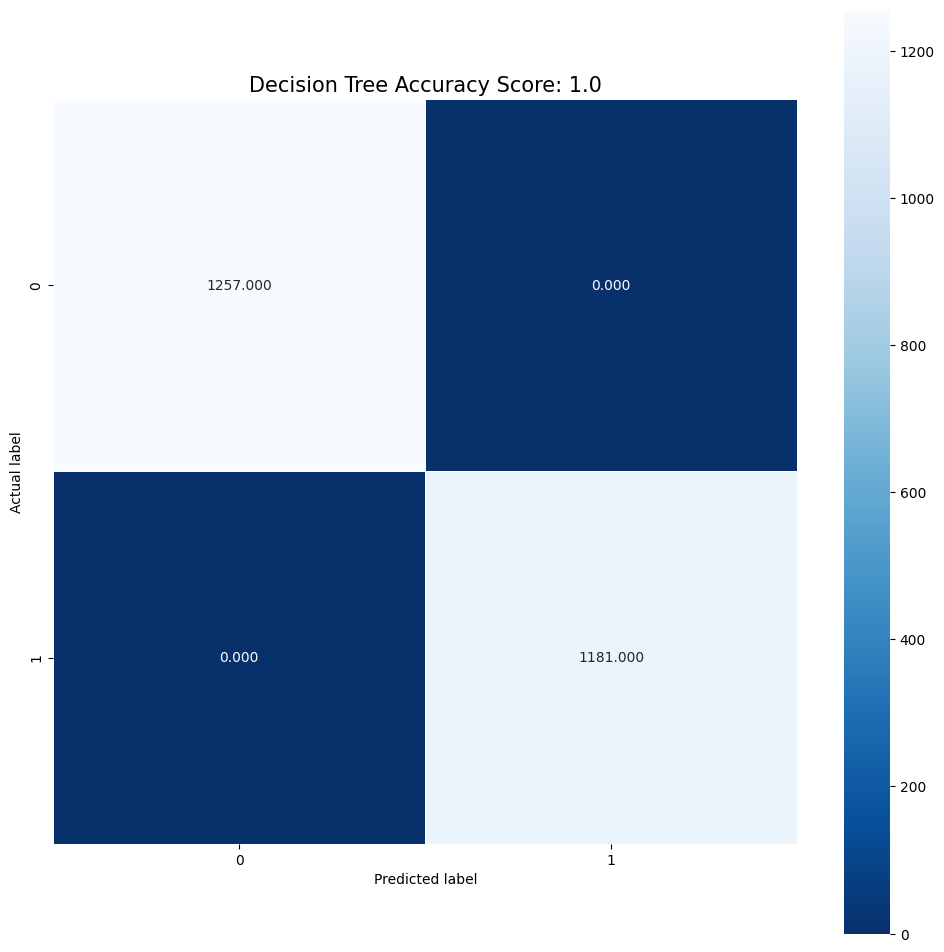

In [11]:
# Tính toán ma trận nhầm lẫn
tree_cm = metrics.confusion_matrix(y_test, tree_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tree_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Decision Tree Accuracy Score: {0}'.format(tree_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 8

In [12]:
clf = tree.DecisionTreeClassifier(criterion="gini", random_state=0)
#Train Decision Tree Classifer
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [13]:
#Predict the response for test dataset
cart_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
cart_score = metrics.accuracy_score(y_test, cart_pred)
print("Accuracy:", cart_score)
print("Report:", metrics.classification_report(y_test, cart_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 1.0
Report:               precision    recall  f1-score   support

           e       1.00      1.00      1.00      1257
           p       1.00      1.00      1.00      1181

    accuracy                           1.00      2438
   macro avg       1.00      1.00      1.00      2438
weighted avg       1.00      1.00      1.00      2438

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


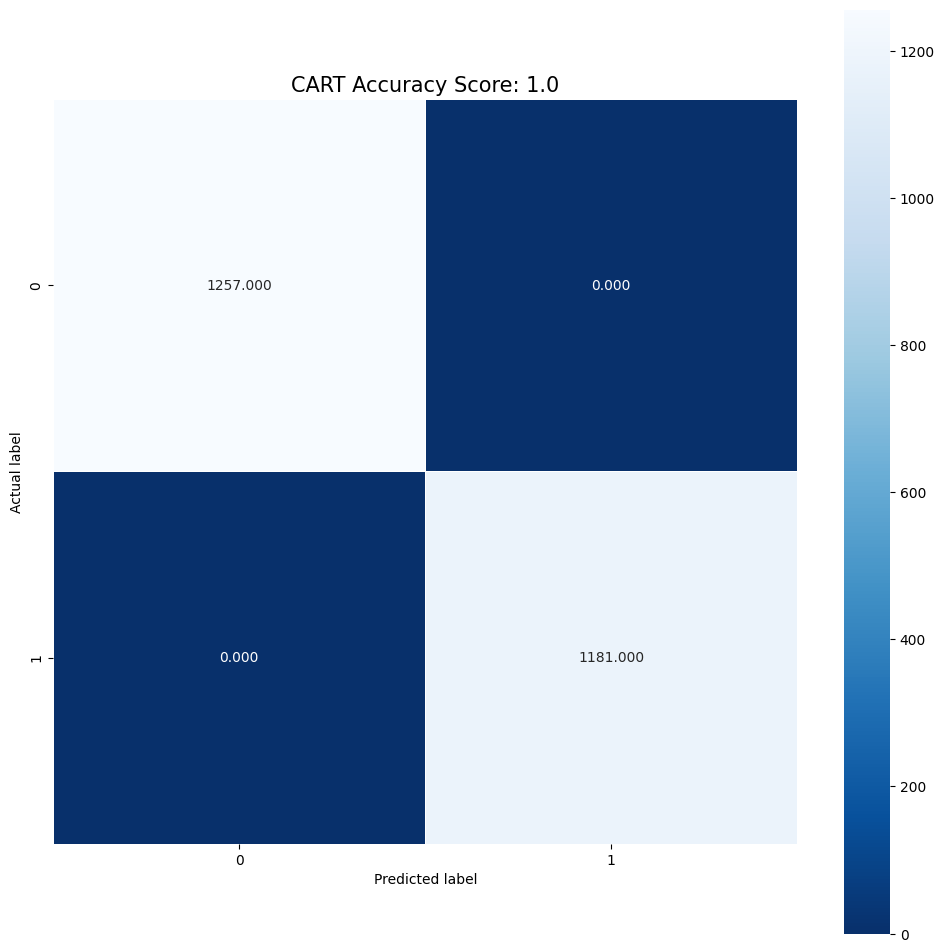

In [14]:
# Tính toán ma trận nhầm lẫn
cart_cm = metrics.confusion_matrix(y_test, cart_pred)

# Và biểu diễn nó lên đồ thị heatmap
plt.figure(figsize=(12,12))
sns.heatmap(cart_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'CART Accuracy Score: {0}'.format(cart_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 9

In [15]:
gnb = GaussianNB()
bayes_pred = gnb.fit(X_train, y_train).predict(X_test)

print("Võ Thành Hoàng Phúc - 6351071056")

Võ Thành Hoàng Phúc - 6351071056


In [16]:
# Model Accuracy, how often is the classifier correct?
bayes_score = metrics.accuracy_score(y_test, bayes_pred)
print("Accuracy:", bayes_score)
print("Report:", metrics.classification_report(y_test, bayes_pred))

print("Võ Thành Hoàng Phúc - 6351071056")

Accuracy: 0.9643150123051681
Report:               precision    recall  f1-score   support

           e       1.00      0.93      0.96      1257
           p       0.93      1.00      0.96      1181

    accuracy                           0.96      2438
   macro avg       0.97      0.97      0.96      2438
weighted avg       0.97      0.96      0.96      2438

Võ Thành Hoàng Phúc - 6351071056


Võ Thành Hoàng Phúc - 6351071056


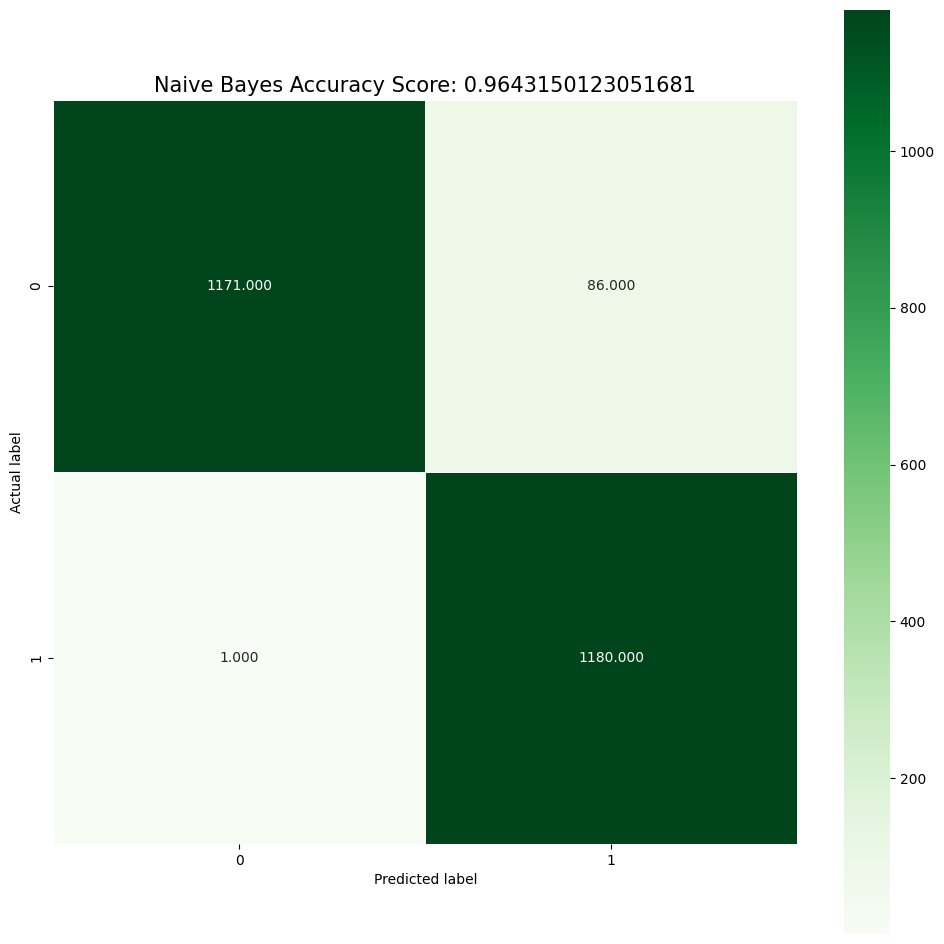

In [17]:
bayes_cm = metrics.confusion_matrix(y_test, bayes_pred)

plt.figure(figsize=(12,12))
sns.heatmap(bayes_cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Greens');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
title = 'Naive Bayes Accuracy Score: {0}'.format(bayes_score)
plt.title(title, size = 15);

print("Võ Thành Hoàng Phúc - 6351071056")

# Câu 10

Decision Tree và CART
- Hiệu suất hoàn hảo: Cả hai mô hình Cây quyết định (Decision Tree và CART) đều đạt độ chính xác tuyệt đối 100%.

- Các chỉ số Precision, Recall, và F1-score đều là 1.00 cho cả hai lớp.


Naive Bayes
- Hiệu suất xuất sắc: Naive Bayes đạt độ chính xác 96.4%, một kết quả rất cao, nhưng không hoàn hảo.
